In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
%matplotlib inline

# sns show grid
sns.set(style="darkgrid")

In [ ]:
# read data/dataset.csv with index column as date
df = pd.read_csv('./data/dataset.csv')
df.tail()


,Date,Open,Close,Rating,10YR Open Price,ADA Open Price,BNB Open Price,BTC Fear Greed Index,"BTC / Fees, total, USD","BTC / Supply, Miner, held by all mining entities, USD",...,DXY Open Price,ETH Open Price,GOLD Open Price,MATIC Open Price,NASDAQ Open Price,NIKKEI225 Open Price,OIL Open Price,S&P500 Open Price,SILVER Open Price,SOL Open Price
3530,2024-05-19,66937.929688,66278.367188,SELL,4.396,0.482408,580.481567,73,1084569.810,1.186680e+11,...,104.500000,3122.824707,2380.699951,0.709525,16708.490234,38561.039063,79.379997,5303.100098,29.760000,172.539200
3531,2024-05-20,66278.742188,71448.195313,BUY,4.422,0.467602,574.631653,72,1265070.367,1.275220e+11,...,104.500000,3071.858887,2415.800049,0.683313,16702.019531,38761.710938,80.010002,5305.350098,30.995001,170.091354
3532,2024-05-21,71443.062500,70136.531250,SELL,4.430,0.501749,600.601074,70,2001241.351,1.257570e+11,...,104.599998,3663.011230,2429.500000,0.750441,16736.099609,39232.160156,79.699997,5298.689941,32.494999,186.519516
3533,2024-05-22,70135.320313,69122.335938,SELL,4.453,0.494774,618.420471,76,1470202.273,1.235740e+11,...,104.620003,3789.372803,2417.500000,0.729187,16839.019531,38823.910156,78.209999,5319.279785,32.029999,178.115677
3534,2024-05-23,69121.304688,67929.562500,SELL,4.418,0.483130,614.671875,76,2025298.487,1.212240e+11,...,104.900002,3737.178467,2371.199951,0.722946,16996.390625,38803.128906,77.290001,5340.259766,30.344999,176.863113


In [8]:
# show the Count,Mean,Std,Min,Max of the data except for Date and Rating
# save df.describe() with each column as a row
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3535.0,1.632724e+04,1.812670e+04,1.768970e+02,1.037845e+03,8.759752e+03,2.713136e+04,7.307938e+04
Close,3535.0,1.634518e+04,1.814332e+04,1.781030e+02,1.038370e+03,8.757788e+03,2.714977e+04,7.308350e+04
10YR Open Price,3535.0,2.365869e+00,9.758366e-01,4.840000e-01,1.708000e+00,2.252000e+00,2.895000e+00,4.997000e+00
ADA Open Price,3535.0,3.270624e-01,5.041439e-01,2.395400e-02,2.516000e-02,8.373100e-02,3.947385e-01,2.966390e+00
BNB Open Price,3535.0,1.249768e+02,1.746342e+02,1.511360e+00,2.053140e+00,1.627596e+01,2.669790e+02,6.763159e+02
BTC Fear Greed Index,3535.0,4.026167e+01,1.915746e+01,5.000000e+00,3.000000e+01,3.000000e+01,5.200000e+01,9.500000e+01
"BTC / Fees, total, USD",3535.0,1.107418e+06,2.643479e+06,2.517395e+03,8.165298e+04,3.416181e+05,8.824428e+05,7.830932e+07
"BTC / Supply, Miner, held by all mining entities, USD",3535.0,2.942278e+10,3.256025e+10,3.503567e+08,1.961356e+09,1.568943e+10,4.909211e+10,1.310940e+11
"BTC / Miner revenue, USD",3535.0,1.815946e+07,1.686674e+07,6.282644e+05,2.334961e+06,1.433691e+07,2.642120e+07,1.046782e+08
"BTC / Difficulty, last",3535.0,1.713797e+13,2.095080e+13,2.982973e+10,4.314755e+11,9.013790e+12,2.427230e+13,8.810420e+13


In [9]:
df.describe().T.to_csv('./data/describe.csv')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]),
 [Text(-500.0, 0, '2023-01-09'),
  Text(0.0, 0, '2014-09-18'),
  Text(500.0, 0, '2016-01-31'),
  Text(1000.0, 0, '2017-06-14'),
  Text(1500.0, 0, '2018-10-27'),
  Text(2000.0, 0, '2020-03-10'),
  Text(2500.0, 0, '2021-07-23'),
  Text(3000.0, 0, '2022-12-05'),
  Text(3500.0, 0, '2024-04-19'),
  Text(4000.0, 0, '')])

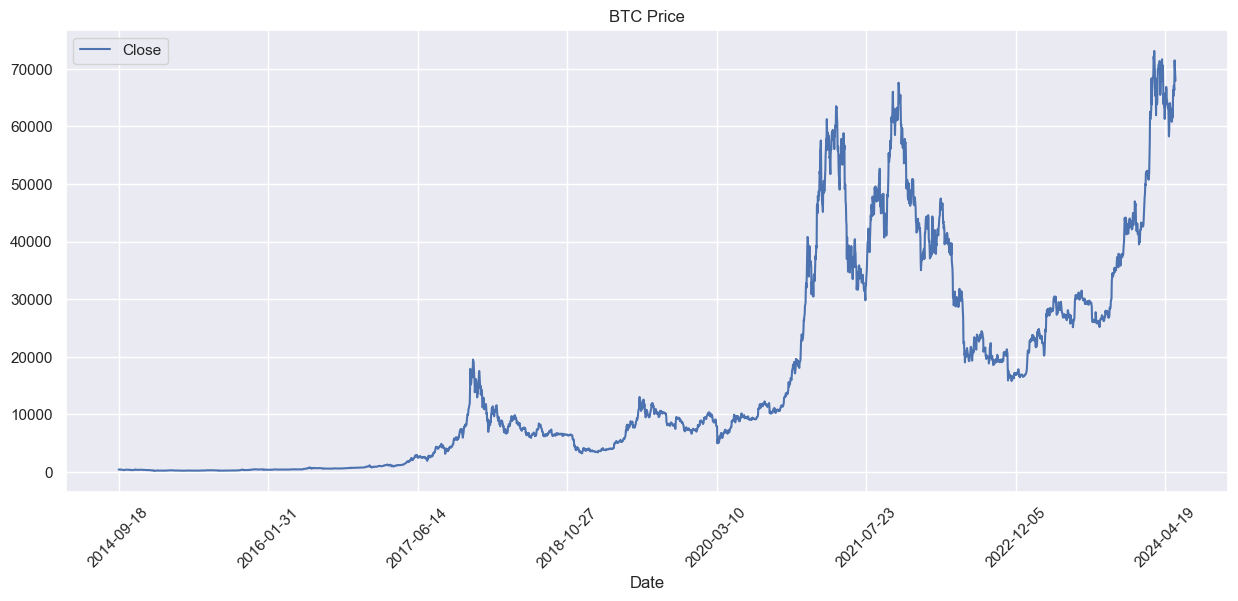

In [10]:
df.plot(x='Date', y='Close', title='BTC Price', figsize=(15, 6))
# rotate x-axis labels
plt.xticks(rotation=45)

C:\Users\ZhiZh\AppData\Local\Temp\ipykernel_9304\1198977376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.rename(columns={'Open': 'BTC Open Price'}, inplace=True)


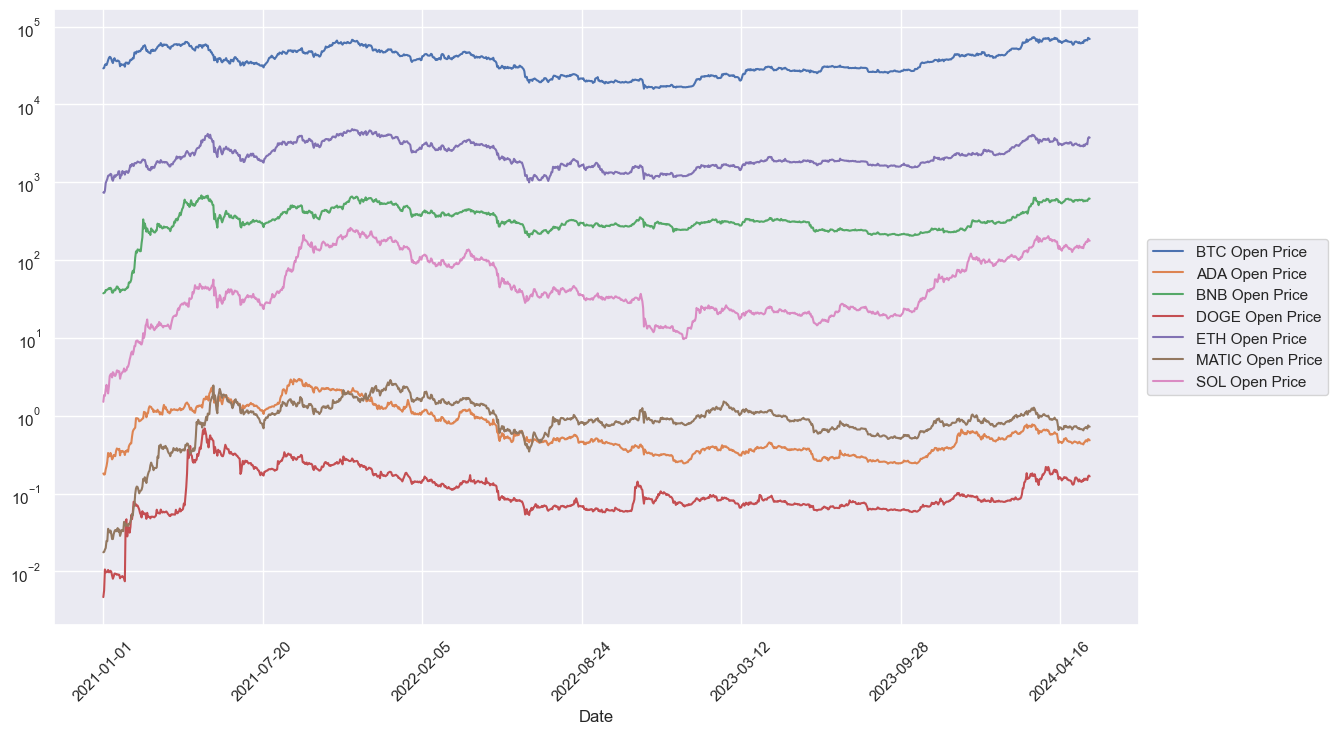

In [11]:
# create new df with data from 2018 onwards
df_2021 = df[df['Date'] >= '2021-01-01']

df_2021.rename(columns={'Open': 'BTC Open Price'}, inplace=True)


df_2021.plot(x='Date', y=['BTC Open Price', 'ADA Open Price', 'BNB Open Price', 'DOGE Open Price', 'ETH Open Price', 'MATIC Open Price', 'SOL Open Price'],  
             figsize=(14, 8))

plt.yscale('log')
# legend outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.show()


<Axes: >

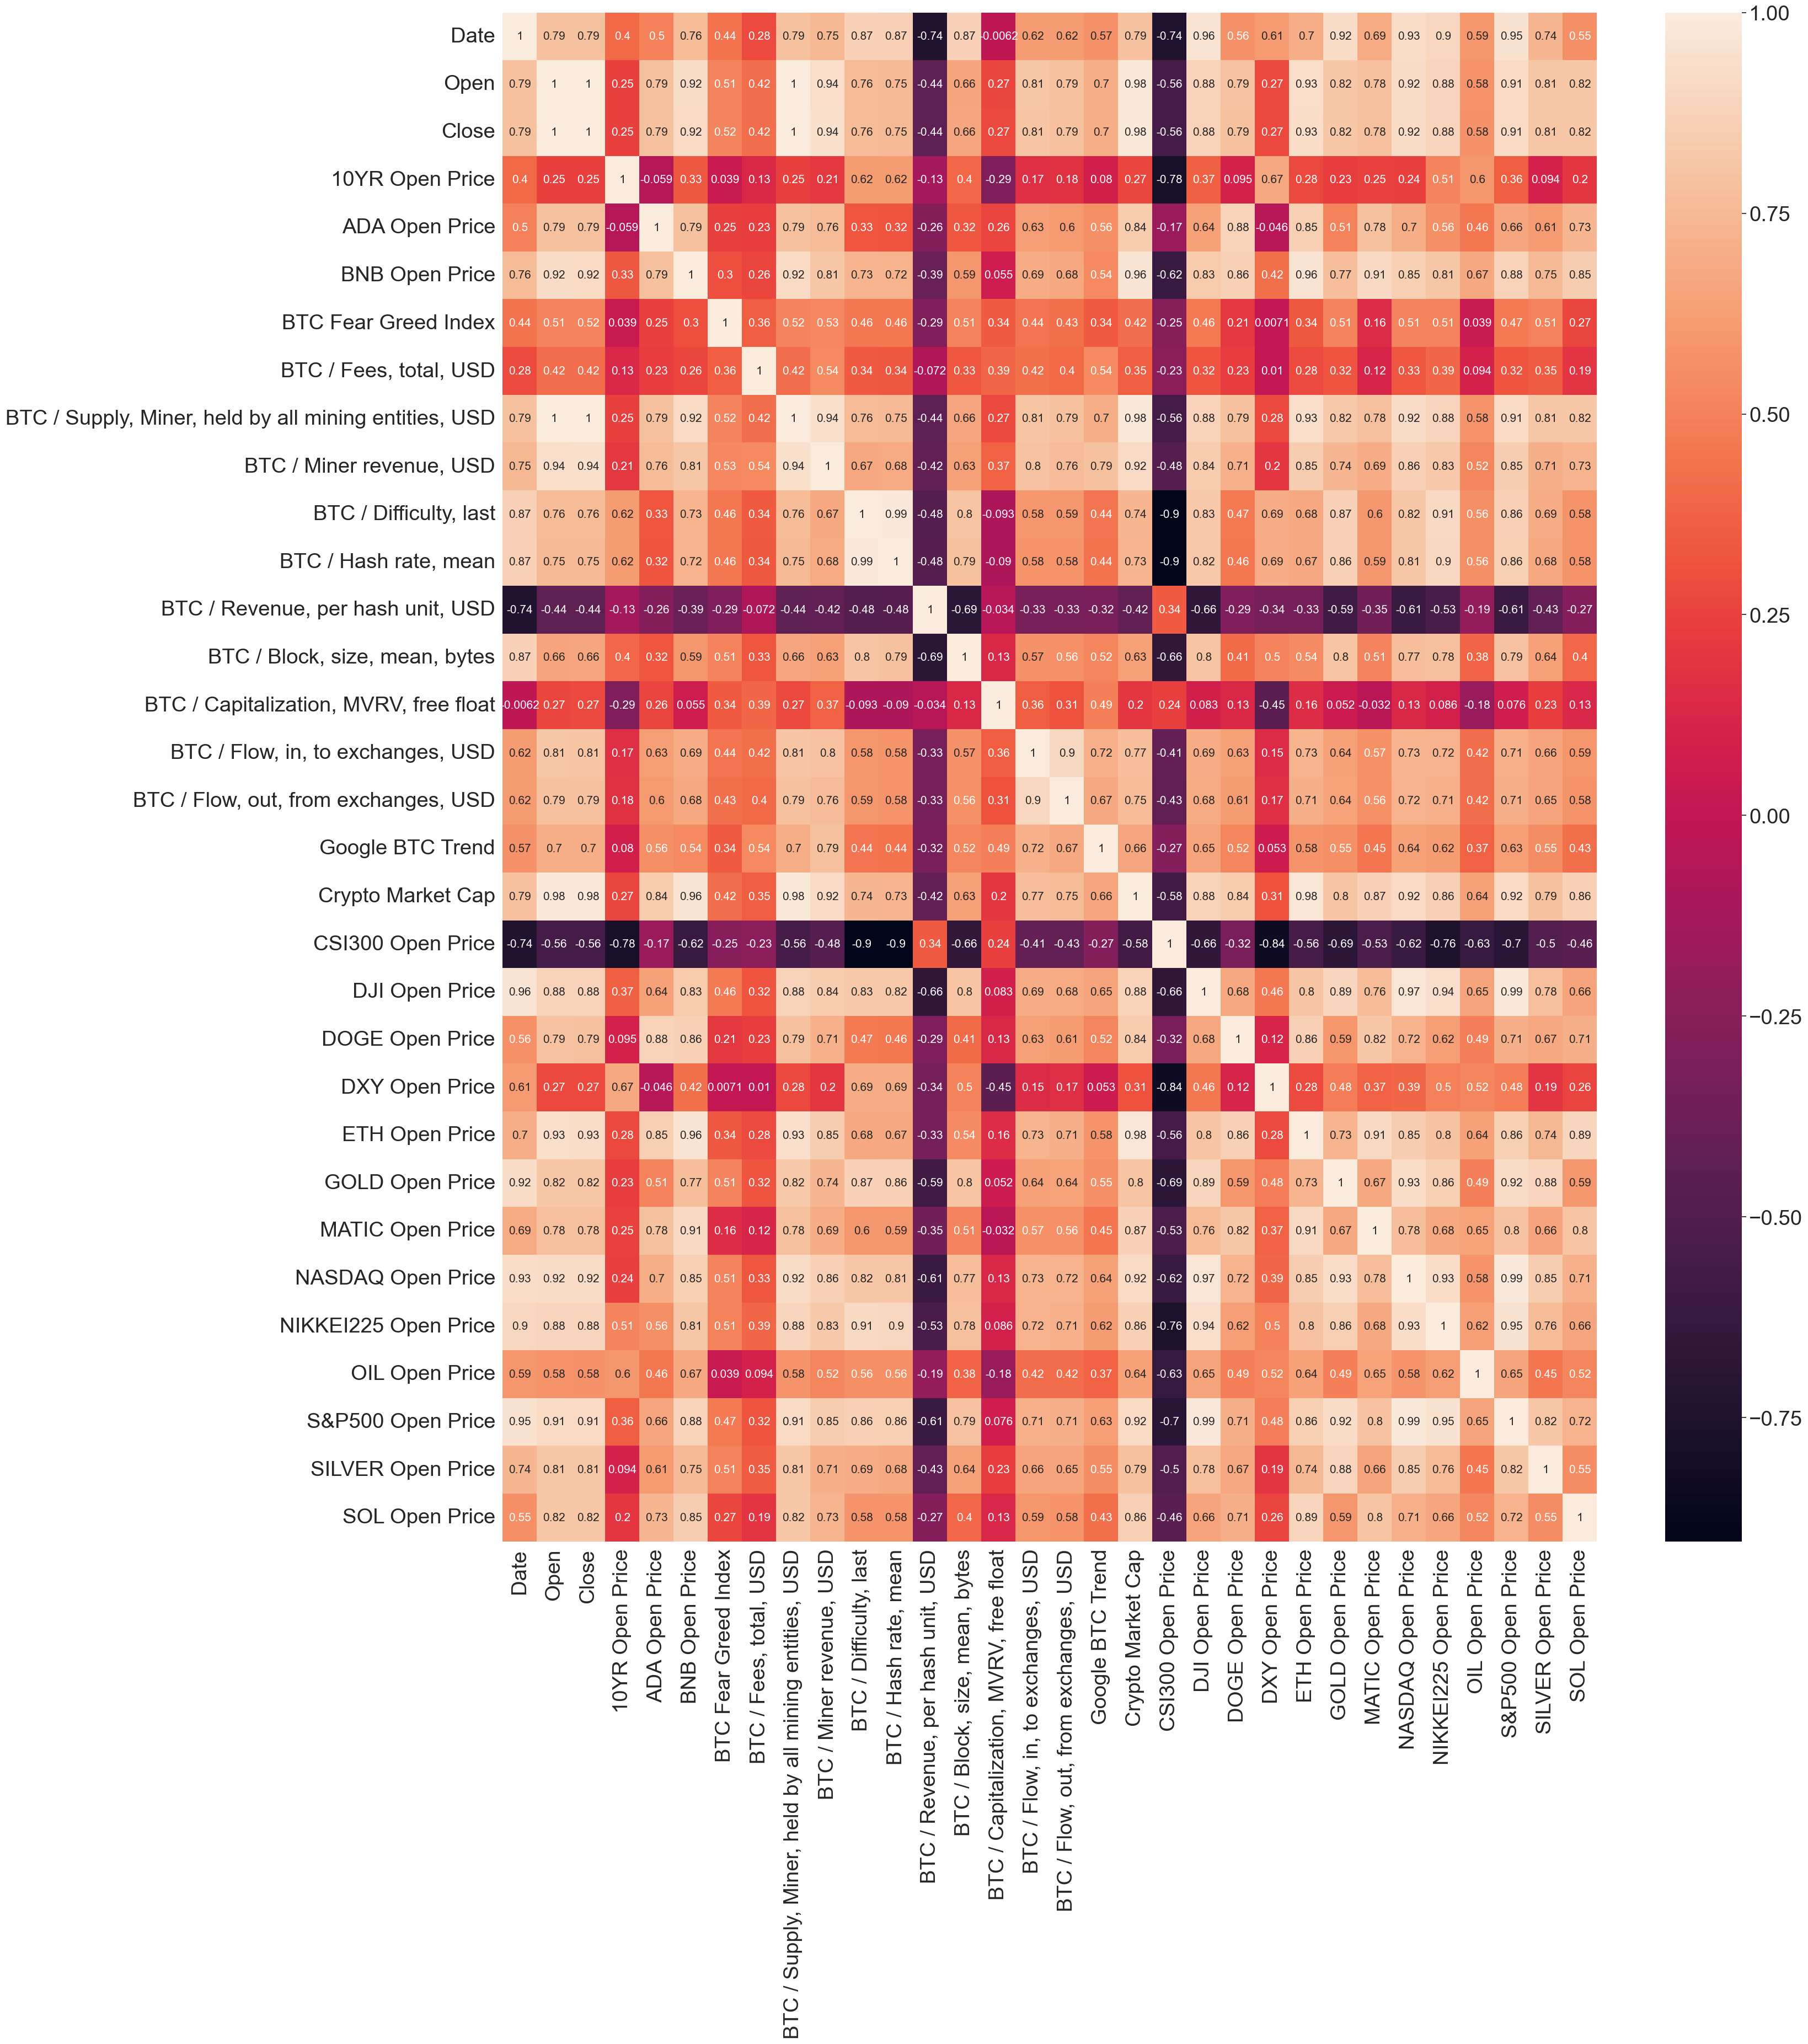

In [12]:
df_copy = df.copy()
df_copy.drop('Rating', axis=1, inplace=True)
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

plt.figure(figsize=(32, 36))
sns.set(font_scale=2.5)
sns.heatmap(df_copy.corr(), annot=True, annot_kws={'fontsize': 15})


In [13]:
# get earliest date and latest date
earliest_date = df['Date'].min()
latest_date = df['Date'].max()
print(f'Earliest date: {earliest_date}, Latest date: {latest_date}')

Earliest date: 2014-09-18, Latest date: 2024-05-23
